## Week 6: K-means Clustering

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

**(1a) Load the data file 'kmc-data1.xlsx' and visualize the data.**

In [19]:
df_orig = pd.read_excel("./kmc.xlsx",sheet_name="Data1",header=None)
df = df_orig.copy()
df_orig.head()

,0,1
0,-1.264053,1.527905
1,-0.970711,0.470560
2,-0.100697,0.303793
3,-1.725962,1.585095
4,0.134297,-1.106855


In [20]:
df.describe()

,0,1
count,300.000000,300.000000
mean,-0.042479,2.647752
std,3.346732,2.176512
min,-5.999158,-2.589323
25%,-3.359573,0.674117
50%,-0.022848,3.256135
75%,3.136942,4.222386
max,6.066461,7.494883


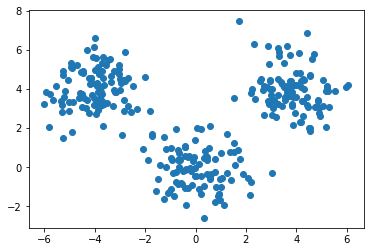

In [21]:
plt.scatter(df[0],df[1])
plt.show()

**(1b) Implement K-means clustering. **

**(1c) Let $K = 3$ and the initial cluster means be $[0,0], [4,4]$ and $[-4,4]$. Plot the final clusters with K-means clustering.**

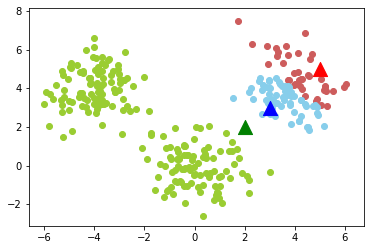

In [29]:
#Initial plot
K = 3
cluster_list = np.array([[2,2],[5,5],[3,3]])
for i in range(K):
    df["Distance"+str(i+1)] = np.linalg.norm(df.iloc[:,:2]-cluster_list[i],axis=1)**2
df["cluster_loc"] = df.iloc[:,2:].idxmin(axis=1)

plt.scatter(df.loc[df.cluster_loc=="Distance1",0],df.loc[df.cluster_loc=="Distance1",1],color='yellowgreen')
plt.scatter(cluster_list[0,0],cluster_list[0,1],color='g',marker='^',s=200)
plt.scatter(df.loc[df.cluster_loc=="Distance2",0],df.loc[df.cluster_loc=="Distance2",1],color='indianred')
plt.scatter(cluster_list[1,0],cluster_list[1,1],color='r',marker='^',s=200)
plt.scatter(df.loc[df.cluster_loc=="Distance3",0],df.loc[df.cluster_loc=="Distance3",1],color='skyblue')
plt.scatter(cluster_list[2,0],cluster_list[2,1],color='b',marker='^',s=200)

plt.show()

[[-3.99090257  4.03253516]
 [ 3.83814758  3.94217913]
 [ 0.06588589 -0.07250832]]


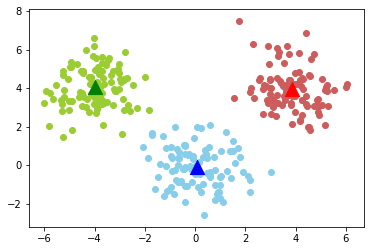

In [31]:
K = 3
cluster_list = np.array([[1,2],[5,5],[3,3]],dtype=float)
for epoch in range(10):
    for i in range(K):
        df["Distance"+str(i+1)] = np.linalg.norm(df.iloc[:,:2]-cluster_list[i],axis=1)**2
    df["cluster_loc"] = df.iloc[:,2:5].idxmin(axis=1)
    for i in range(K):
        cluster_list[i,:] = np.mean(df.loc[df.cluster_loc=="Distance"+str(i+1)].iloc[:,0:2],axis=0).values
print(cluster_list)
#Final plot
plt.scatter(df.loc[df.cluster_loc=="Distance1",0],df.loc[df.cluster_loc=="Distance1",1],color='yellowgreen')
plt.scatter(cluster_list[0,0],cluster_list[0,1],color='g',marker='^',s=200)
plt.scatter(df.loc[df.cluster_loc=="Distance2",0],df.loc[df.cluster_loc=="Distance2",1],color='indianred')
plt.scatter(cluster_list[1,0],cluster_list[1,1],color='r',marker='^',s=200)
plt.scatter(df.loc[df.cluster_loc=="Distance3",0],df.loc[df.cluster_loc=="Distance3",1],color='skyblue')
plt.scatter(cluster_list[2,0],cluster_list[2,1],color='b',marker='^',s=200)

plt.show()

**(1d) Compute the sum of square distance of each point from the cluster mean.**

In [33]:
distance_1 = np.sum(df.loc[df.cluster_loc=="Distance1","Distance1"])
distance_2 = np.sum(df.loc[df.cluster_loc=="Distance2","Distance2"])
distance_3 = np.sum(df.loc[df.cluster_loc=="Distance3","Distance3"])
sum_of_distance = distance_1+distance_2+distance_3
print("Sum of distance:{}".format(sum_of_distance))


Sum of distance:589.9093182547097


**(1e) Repeat the above exercise for all $K = 2,3,4$. **

**(1f) Plot the final clusters (for $K = 2,3,4$) and report the sum of square distance of each point from the cluster mean. Comment.**

[[-2.22690699  2.11517464]
 [ 3.62423943  3.5417215 ]]
Sum of distance:2219.671971591098 for K=2


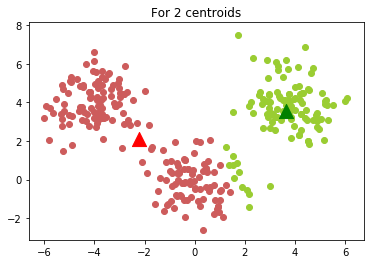

[[ 3.83814758  3.94217913]
 [ 0.06588589 -0.07250832]
 [-3.99090257  4.03253516]]
Sum of distance:589.9093182547097 for K=3


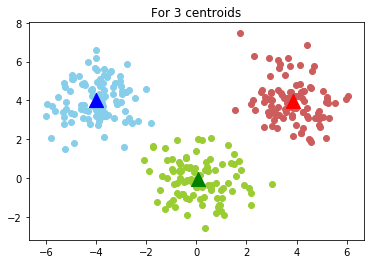

[[-3.99090257  4.03253516]
 [ 3.3511356   4.62973732]
 [ 4.36574388  3.19732442]
 [ 0.06588589 -0.07250832]]
Sum of distance:513.0016514945695 for K=4


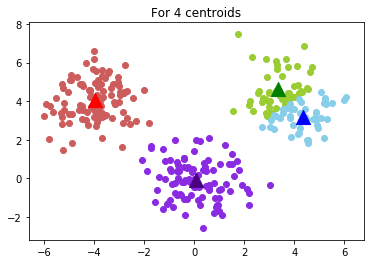

In [36]:
K_list = [2,3,4]
color_points = ['indianred','yellowgreen','skyblue','blueviolet']
color_cent = ['red','green','blue','indigo']
for K in K_list:
    #Initialization
    df = df_orig.copy()
    cluster_list = 5*np.random.rand(K,2)+1
    for epoch in range(10):
        for i in range(K):
            df["Distance"+str(i+1)] = np.linalg.norm(df.iloc[:,:2]-cluster_list[i],axis=1)**2
        df["cluster_loc"] = df.iloc[:,2:2+K].idxmin(axis=1)
        for i in range(K):
            cluster_list[i,:] = np.mean(df.loc[df.cluster_loc=="Distance"+str(i+1)].iloc[:,0:2],axis=0).values

    print(cluster_list)
    #Sum of squares and final plot
    sum_of_distance = 0
    for i in range(K):
        sum_of_distance+=np.sum(df.loc[df.cluster_loc=="Distance"+str(i+1),"Distance"+str(i+1)])
        #For plotting pursopes
        plt.scatter(df.loc[df.cluster_loc=="Distance"+str(i+1),0],df.loc[df.cluster_loc=="Distance"+str(i+1),1],color=color_points[i])
        plt.scatter(cluster_list[i,0],cluster_list[i,1],color=color_cent[i],marker='^',s=200)
    print("Sum of distance:{} for K={}".format(sum_of_distance,K))
    #Final plot
    plt.title("For {} centroids".format(K))
    plt.show()

We see that as we increase the number of clusters the sum of squares of distance goes on decreasing. Hence we cant determine the correct number of clusters by just blindly minimizing sum of squares of distance. However if we look closely, we see there is a sharp drop in the value as we go from 2 to 3 clusters and it doesnt decrese much as we go from 3 to 4. Hence by looking at this we can say 3 is the correct number of clusters

**(2a) Load the data from the file 'kmc-data2.xlsx' and visualize the data. **

In [38]:
df_orig = pd.read_excel("./kmc.xlsx",sheet_name="Data2")
df = df_orig.copy()
df_orig.head()

,X,Y
0,0.283953,-0.630628
1,-0.198031,0.618049
2,0.311375,0.610005
3,0.086885,0.533743
4,0.313070,0.369392


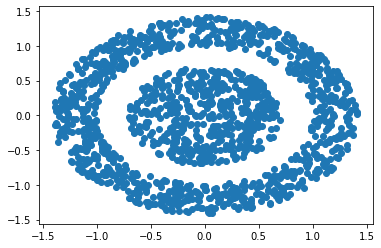

In [40]:
plt.scatter(df['X'],df['Y'])
plt.show()

**(2b) Cluster the data with K-means clustering. Consider $K = 2$. **

[[-0.25213433 -0.59399761]
 [ 0.22420967  0.57784431]]
Sum of distance:1010.9129128653512 for K=2


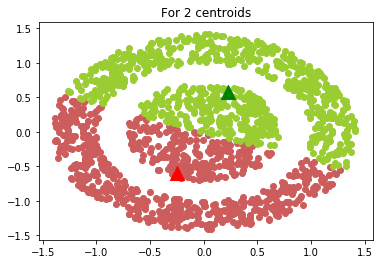

In [46]:

color_points = ['indianred','yellowgreen']
color_cent = ['red','green']
K = 2
#Initialization
cluster_list = np.random.rand(K,2)
for epoch in range(10):
    for i in range(K):
        df["Distance"+str(i+1)] = np.linalg.norm(df.iloc[:,:2]-cluster_list[i],axis=1)**2
    df["cluster_loc"] = df.iloc[:,2:2+K].idxmin(axis=1)
    for i in range(K):
        cluster_list[i,:] = np.mean(df.loc[df.cluster_loc=="Distance"+str(i+1)].iloc[:,0:2],axis=0).values

print(cluster_list)
#Sum of squares and final plot
sum_of_distance = 0
for i in range(K):
    sum_of_distance+=np.sum(df.loc[df.cluster_loc=="Distance"+str(i+1),"Distance"+str(i+1)])
    #For plotting pursopes
    plt.scatter(df.loc[df.cluster_loc=="Distance"+str(i+1),'X'],df.loc[df.cluster_loc=="Distance"+str(i+1),'Y'],color=color_points[i])
    plt.scatter(cluster_list[i,0],cluster_list[i,1],color=color_cent[i],marker='^',s=200)
print("Sum of distance:{} for K={}".format(sum_of_distance,K))
#Final plot
plt.title("For {} centroids".format(K))
plt.show()

**(2c) Suppose you want to cluster the data into two rings. Now, transform the data such that K-means clustering identifies the two rings as clusters. **

[0.26070803567601375, 1.4883409316829073]
Sum of distance:92.3646640288753 for K=2


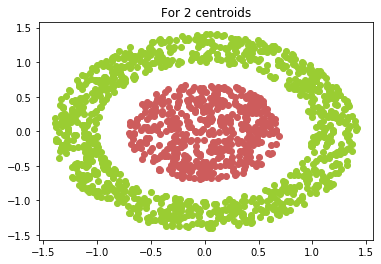

In [76]:
#Transformation
#We only consider one feature x**2+y**2=radius
df = df_orig.copy()
df['rad'] = df['X']**2+df['Y']**2 

color_points = ['indianred','yellowgreen']
color_cent = ['red','green']
K = 2
#Initialization
cluster_list = [0,2]
for epoch in range(10):
    for i in range(K):
        df["Distance"+str(i+1)] = (df.iloc[:,2]-cluster_list[i])**2
    df["cluster_loc"] = df.iloc[:,3:3+K].idxmin(axis=1)
    for i in range(K):
        cluster_list[i] = np.mean(df.loc[df.cluster_loc=="Distance"+str(i+1)].iloc[:,2],axis=0)

print(cluster_list)
#Sum of squares and final plot
sum_of_distance = 0
for i in range(K):
    sum_of_distance+=np.sum(df.loc[df.cluster_loc=="Distance"+str(i+1),"Distance"+str(i+1)])
    #For plotting pursopes
    plt.scatter(df.loc[df.cluster_loc=="Distance"+str(i+1),'X'],df.loc[df.cluster_loc=="Distance"+str(i+1),'Y'],color=color_points[i])
#     plt.scatter(cluster_list[i,0],cluster_list[i,1],color=color_cent[i],marker='^',s=200)
print("Sum of distance:{} for K={}".format(sum_of_distance,K))
#Final plot
plt.title("For {} centroids".format(K))
plt.show()

**(3a) (Optional) Consider the data in 'kmc-data1.xlsx'. Now, approximate the distribution of the data with a mixture of Gaussians, one per cluster. Report the distribution. **

**(3b) (Optional) Sample points from the mixture distribution and see if the points lie in the same cluster (distribution) from which it was generated. **